crm_data.csv
Данные, эмулирующие результат выгрузки из CRM (Customer relationship management) системы, представляют собой таблицу с перечнем самой разной информации о клиенте, доступной в моменте. Как и в реальных CRM-системах, различная информация может храниться в разных системах, иметь разную степень свежести, и иметь еще множество увлекательных для аналитиков свойств. 
Таблица содержит информацию о 2899 клиентах и содержит 20 столбцов с различной информацией о клиентах. Для участников самое важное в этих данных — поле clnt_id, соответствующее clnt_id в других таблицах, предоставленных в рамках соревнования. 
Самые важные поля в этой таблице следующие:

clnt_id — идентификатор клиентов банка;
is_premium — целевая переменная, которую нужно предсказать: 1- клиенты, имеющие премиальную карту; 0 - обычные клиенты. Целевая переменная доступна не для всех клиентов и именно в ее предсказании для новых клиентов и состоит задача соревнования. 
В процессе генерации предоставленного синтетического файла ни один реальный клиент не пострадал :) 

sample_subm
Это пример тестового файла, который вам нужно отправить продакт-менеджеру, пригласившему вас помочь с задачей предсказания премиальных клиентов. В банке стало больше новых клиентов и нужно предсказать, станут ли они пользователями премиальных карт или нет. Файл имеет следующую структуру:

clnt_id — идентификаторы новых клиентов банка, для которых нужно предсказать, станут ли они премиальными клиентами;
is_premium — бинарная метка вашего предсказания: 1 - станут премиальными клиентами; 0 - не станут. Обратите внимание: продакт-менеджера не интересуют ни вероятности, ни расстояния до разделяющих гиперплоскостей. Нужны просто четкие предсказания: станет или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crm_data=pd.read_csv('crm_data.csv')
crm_data

,clnt_id,clnt_gender,clnt_age,clnt_device,clnt_device_get,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
0,2001,1.0,32,sO@*%lun08,vgIXi0LgoZHQ71Mmekm1,0.0,0.0,1,180000,2,6,3,1,1428,320,76,7227.0,1.0
1,2006,1.0,20,)!%OA9qpZP,lmE6l7DelsqZNYgxcsAZ,1.0,0.0,0,250000,5,11,4,1,1428,1000,66,7227.0,1.0
2,2012,0.0,24,IgSHlRCsd#,yhUtC1GSVpWWNPCI9EYo,NaN,0.0,0,310000,4,8,4,1,1428,1750,18,7233.0,1.0
3,2013,0.0,42,SSbZb5Hpun,TM4ptl78Lwzhng7PAY4G,1.0,0.0,1,110000,8,9,6,1,1428,1180,30,7227.0,1.0
4,2014,0.0,25,N)Eb*EJXD4,lmE6l7DelsqZNYgxcsAZ,1.0,0.0,1,300000,8,10,4,1,1428,1000,24,7227.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,4984,1.0,24,!Zusbz4GJ@,DUPFnmZiv2kqwJJgYK0p,0.0,0.0,1,370000,5,28,0,1,1427,100,0,NaN,NaN
2895,4986,0.0,22,YBjx-RAB9!,4CdUr2g9UqwFuqdVaWdO,0.0,1.0,0,0,2,30,6,1,1428,1000,0,NaN,NaN
2896,4987,0.0,24,nR4%tYIRXv,qhf9RhOTHsX15m3UzA94,1.0,0.0,0,21000000,4,31,27,1,1428,1000,0,NaN,NaN
2897,4991,0.0,24,^+3(I8C%&b,NaN,1.0,0.0,3,380000,5,26,25,1,1428,510,0,NaN,NaN


In [3]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clnt_id          2899 non-null   int64  
 1   clnt_gender      2786 non-null   float64
 2   clnt_age         2899 non-null   int64  
 3   clnt_device      2801 non-null   object 
 4   clnt_device_get  2801 non-null   object 
 5   has_car          2692 non-null   float64
 6   has_estate       2711 non-null   float64
 7   clnt_children    2899 non-null   int64  
 8   clnt_income      2899 non-null   int64  
 9   clnt_pick        2899 non-null   int64  
 10  clnt_fortune     2899 non-null   int64  
 11  clnt_status      2899 non-null   int64  
 12  clnt_system      2899 non-null   int64  
 13  spend_last       2899 non-null   int64  
 14  spend_level      2899 non-null   int64  
 15  spend_points     2899 non-null   int64  
 16  manager_contact  755 non-null    float64
 17  is_premium    

In [4]:
crm_data.describe()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
count,2899.000000,2786.000000,2899.000000,2692.000000,2711.000000,2899.000000,2.899000e+03,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.00000,755.000000,1538.000000
mean,3501.526388,0.502513,104.801311,0.503715,0.148654,0.332873,8.736288e+05,4.456019,19.514660,9.270093,1.223870,1427.168679,839.284926,24.61573,7215.978808,0.469441
std,865.813819,0.500083,376.473500,0.500079,0.355812,0.579074,4.225547e+06,2.879040,5.048834,6.429195,0.469096,6.500000,2716.802823,65.01844,33.099153,0.499228
min,2000.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,0.000000,1.000000,1295.000000,0.000000,0.00000,7122.000000,0.000000
25%,2748.500000,0.000000,23.000000,0.000000,0.000000,0.000000,1.000000e+05,2.000000,16.000000,4.000000,1.000000,1428.000000,200.000000,0.00000,7227.000000,0.000000
50%,3502.000000,1.000000,26.000000,1.000000,0.000000,0.000000,2.000000e+05,4.000000,20.000000,9.000000,1.000000,1428.000000,427.000000,0.00000,7227.000000,0.000000
75%,4249.500000,1.000000,31.000000,1.000000,0.000000,1.000000,3.000000e+05,7.000000,23.000000,15.000000,1.000000,1428.000000,980.000000,0.00000,7227.000000,1.000000
max,4999.000000,1.000000,2001.000000,1.000000,1.000000,4.000000,3.900000e+07,9.000000,34.000000,31.000000,3.000000,1428.000000,120000.000000,594.00000,7248.000000,1.000000


In [5]:
crm_data.groupby('clnt_system').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_system,,,,,,,,,,,,,,,
1,3497.102719,0.502688,101.946914,0.506735,0.151543,0.331032,902887.354338,4.444540,19.441088,9.238671,1427.198533,794.077687,22.348295,7214.950704,0.434992
2,3497.038835,0.500000,116.638835,0.482180,0.142558,0.349515,784291.262136,4.504854,19.590291,9.351456,1427.058252,1041.765049,32.722330,7219.725000,0.600775
3,3689.000000,0.515152,112.522388,0.564516,0.095238,0.268657,548507.462687,4.477612,21.477612,9.731343,1426.985075,846.268657,40.716418,7215.407407,0.735294


есть явно видимая корреляция между уровнем clnt_system и is_premium, при том, что income,childre,estate - меньше

In [6]:
crm_data.groupby('clnt_gender').mean()

,clnt_id,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_gender,,,,,,,,,,,,,,,
0.0,3492.974747,96.798701,0.493002,0.148805,0.341991,790569.985570,4.405483,19.494228,9.155123,1.222222,1427.160895,892.321789,23.992063,7214.396341,0.430168
1.0,3512.583571,112.202857,0.518745,0.150077,0.320000,927892.857143,4.494286,19.507857,9.368571,1.222857,1427.136429,789.923571,25.556429,7217.908189,0.505168


In [7]:
crm_data.groupby('has_car').mean()

,clnt_id,clnt_gender,clnt_age,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
has_car,,,,,,,,,,,,,,,
0.0,3469.764970,0.491023,100.711078,0.148649,0.325599,832170.658683,4.395958,19.432635,9.315868,1.225299,1427.282186,848.64521,27.701347,7216.682065,0.490985
1.0,3534.277286,0.516768,106.556785,0.149762,0.342920,836755.162242,4.528761,19.651180,9.269912,1.221239,1427.219764,836.79646,22.354720,7215.112392,0.459497


In [8]:
crm_data.groupby('has_estate').mean()

,clnt_id,clnt_gender,clnt_age,has_car,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
has_estate,,,,,,,,,,,,,,,
0.0,3491.499567,0.501355,103.887348,0.500466,0.337522,921382.149047,4.438475,19.470104,9.233969,1.226603,1427.102253,811.999567,24.343588,7216.402010,0.469338
1.0,3563.476427,0.503856,108.188586,0.502660,0.327543,649851.116625,4.451613,19.918114,9.555831,1.198511,1427.404467,1038.012407,26.307692,7213.839623,0.471698


In [9]:
crm_data.groupby('clnt_children').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_children,,,,,,,,,,,,,,,
0,3497.638942,0.508973,103.842308,0.497667,0.146316,7.193029e+05,4.481250,19.538462,9.294712,1.220673,1427.198558,795.638942,23.262981,7214.487572,0.447748
1,3502.789855,0.483969,108.382609,0.523364,0.168992,1.287623e+06,4.434783,19.450725,9.242029,1.240580,1427.050725,986.379710,28.194203,7218.489899,0.524590
2,3497.610619,0.504587,111.796460,0.490566,0.063636,9.527434e+05,4.141593,19.522124,8.893805,1.194690,1427.371681,778.796460,28.238938,7223.870968,0.526316
3,3984.533333,0.466667,25.866667,0.500000,0.214286,2.672000e+06,4.600000,19.133333,9.400000,1.133333,1426.866667,610.133333,21.933333,7228.666667,0.600000
4,3913.000000,0.000000,22.000000,1.000000,0.000000,3.000000e+05,0.000000,19.000000,18.000000,1.000000,1428.000000,400.000000,0.000000,NaN,NaN


чем больше детей, тем выше шанс премиума, при том, что clnt_system ровно наоборот

In [10]:
crm_data.groupby('clnt_pick').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_pick,,,,,,,,,,,,,,,
0,3491.145763,0.498208,85.722034,0.498182,0.162544,0.372881,8.144068e+05,19.962712,9.176271,1.196610,1427.213559,782.501695,19.525424,7218.702703,0.434783
1,3570.272388,0.476562,98.988806,0.462151,0.144578,0.354478,8.488806e+05,19.347015,9.335821,1.212687,1427.361940,925.268657,26.205224,7220.202703,0.500000
2,3438.178161,0.489736,104.948276,0.490566,0.131498,0.310345,1.053477e+06,19.704023,8.666667,1.247126,1426.574713,794.054598,23.824713,7210.273810,0.461078
3,3475.686411,0.500000,114.411150,0.501887,0.144981,0.334495,1.295296e+06,19.393728,10.097561,1.236934,1427.480836,1291.630662,25.219512,7213.067568,0.444444
4,3448.122378,0.456835,115.097902,0.509434,0.164794,0.318182,6.187063e+05,19.479021,9.241259,1.202797,1426.923077,720.486014,22.888112,7215.972222,0.440252
5,3520.444853,0.575290,91.176471,0.508000,0.154150,0.386029,7.405515e+05,19.566176,9.102941,1.227941,1427.492647,654.448529,21.588235,7212.333333,0.444444
6,3592.713781,0.522059,115.678445,0.492366,0.103053,0.303887,7.958304e+05,19.469965,8.674912,1.229682,1427.590106,754.240283,28.240283,7213.855263,0.486486
7,3565.621818,0.515267,83.003636,0.570881,0.185039,0.305455,8.543273e+05,19.741818,9.920000,1.236364,1426.512727,770.072727,30.556364,7220.287671,0.503546
8,3476.919732,0.510563,103.555184,0.510638,0.161871,0.331104,9.435452e+05,19.434783,9.401338,1.234114,1427.518395,826.695652,24.739130,7224.172414,0.502924


In [11]:
crm_data.groupby('clnt_fortune').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_fortune,,,,,,,,,,,,,,,
5,2000.000000,0.000000,24.000000,0.000000,NaN,0.000000,2.100000e+05,1.000000,0.000000,1.000000,1428.000000,300.000000,0.000000,NaN,NaN
6,2277.750000,0.750000,29.000000,0.750000,0.000000,0.750000,2.400000e+05,2.750000,0.750000,1.250000,1428.000000,472.500000,56.500000,7227.000000,1.000000
7,2615.000000,0.555556,236.111111,0.333333,0.000000,0.555556,1.677778e+05,4.333333,2.444444,1.444444,1428.000000,611.222222,0.111111,7227.000000,0.200000
8,2719.210526,0.368421,28.105263,0.235294,0.000000,0.210526,2.105263e+05,4.842105,3.421053,1.368421,1428.000000,728.210526,25.473684,7228.200000,0.416667
9,2785.800000,0.482759,156.166667,0.392857,0.034483,0.200000,1.123333e+06,5.700000,6.000000,1.133333,1426.600000,857.600000,26.933333,7215.333333,0.529412
10,2915.200000,0.452381,26.911111,0.488372,0.162791,0.311111,1.908889e+05,4.888889,1.422222,1.111111,1428.000000,837.266667,18.555556,7198.363636,0.400000
11,3004.428571,0.666667,118.047619,0.559322,0.200000,0.253968,6.788889e+05,4.460317,4.047619,1.126984,1427.063492,773.222222,30.253968,7216.736842,0.514286
12,3023.544304,0.520548,124.303797,0.472222,0.164384,0.354430,7.272152e+05,4.620253,4.253165,1.240506,1427.025316,912.848101,35.962025,7213.565217,0.500000
13,3086.841584,0.525253,121.108911,0.463918,0.157303,0.277228,8.385149e+05,4.603960,5.970297,1.227723,1426.435644,779.188119,27.603960,7203.870968,0.549020


In [12]:
crm_data.groupby('clnt_status').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
clnt_status,,,,,,,,,,,,,,,
0,3378.245690,0.477273,126.219828,0.490741,0.146789,0.310345,1.253233e+06,4.564655,16.487069,1.241379,1426.577586,844.495690,26.176724,7216.647059,0.477612
1,3432.672566,0.482143,61.530973,0.448598,0.140000,0.327434,5.992035e+05,4.168142,18.141593,1.238938,1427.619469,849.584071,27.805310,7217.172414,0.450000
2,3321.697248,0.480769,98.055046,0.528302,0.088235,0.339450,4.269725e+05,4.302752,16.577982,1.110092,1426.614679,778.504587,16.155963,7208.681818,0.345455
3,3403.869347,0.505319,123.597990,0.515957,0.181818,0.366834,3.930653e+05,4.512563,18.256281,1.236181,1427.100503,860.241206,30.417085,7218.533333,0.508772
4,3414.205607,0.500000,116.691589,0.510417,0.118812,0.299065,9.219626e+05,4.280374,17.981308,1.242991,1427.401869,661.943925,27.000000,7211.435897,0.637931
5,3492.405660,0.533981,83.433962,0.520833,0.182692,0.320755,1.257075e+06,4.150943,18.603774,1.245283,1426.320755,578.141509,20.216981,7227.478261,0.433962
6,3430.614973,0.513889,93.844920,0.520588,0.137143,0.344920,5.609893e+05,4.521390,18.090909,1.219251,1427.040107,950.163102,22.922460,7215.505155,0.476923
7,3391.382353,0.514851,121.980392,0.526882,0.097826,0.333333,6.386275e+05,4.568627,18.411765,1.264706,1427.500000,669.362745,11.460784,7194.000000,0.416667
8,3483.019608,0.454545,101.352941,0.515789,0.159574,0.352941,1.320686e+06,4.441176,19.166667,1.235294,1427.480392,687.558824,28.813725,7219.615385,0.452830


In [13]:
crm_data.groupby('is_premium').mean()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact
is_premium,,,,,,,,,,,,,,,
0.0,3494.325980,0.484197,97.810049,0.513263,0.147175,0.286765,844044.117647,4.378676,19.410539,9.199755,1.148284,1427.035539,922.018382,0.00000,NaN
1.0,3496.807479,0.559371,104.458449,0.481698,0.148368,0.361496,800263.157895,4.541551,19.612188,9.193906,1.283934,1426.768698,1360.279778,98.83795,7220.274238


Есть выбросы по возрасту, 2001 явно кто-то перепутал дату рождения и возраст, плюс среднее превышает в 3 раза 75% квартиль. У 75+ нету недвижимости. Среднее по доходу превышает 75% квартиль. Spend last очень странные значения, spend_level надо изучить вместе со spend_points и manager_contact.

<AxesSubplot:>

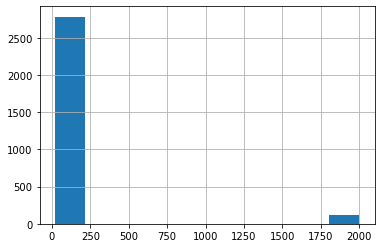

In [14]:
crm_data.clnt_age.hist()

<AxesSubplot:>

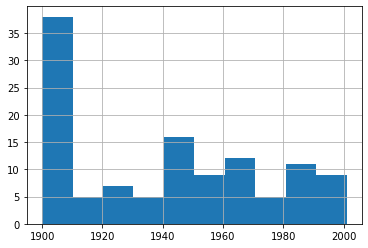

In [15]:
crm_data.loc[crm_data['clnt_age']>1700].clnt_age.hist()

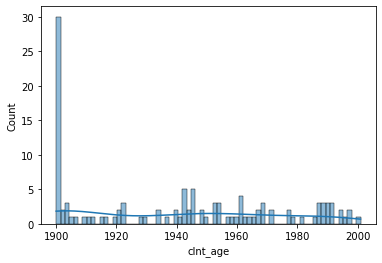

In [16]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1700].clnt_age, kde=True,bins=70)
plt.show()

In [17]:
len(crm_data.loc[crm_data['clnt_age']==1900])

30

1900 заменили как нет данных, надо будет заменить их. С остальными пока не знаю что делать.

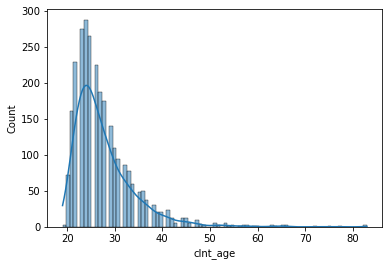

In [18]:
sns.histplot(crm_data.loc[crm_data['clnt_age']<250].clnt_age, kde=True,bins=85)
plt.show()

In [19]:
max(crm_data.loc[crm_data['clnt_age']<250].clnt_age)

83

In [20]:
min(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

1902

Если у кого-то стоит год 1902, то ему уже 118 лет, что вряд ли вероятно, ведь максимум по обычным годам равен лишь 83, плюс скорее всего это будет сильно влиять на алгоритм, поэтому стоит их поставить в Null

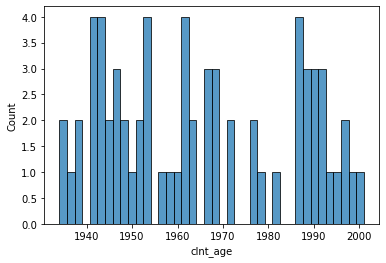

In [21]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1930].clnt_age,bins=40)
plt.show()

In [22]:
len(crm_data.loc[crm_data['clnt_age']>1930].clnt_age)

67

In [23]:
len(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

87

20 значений с высокой вероятностью ошибки, лучше их будет тоже заменить на Null

In [24]:
crm_data.loc[(crm_data['clnt_age']>=1900) & (crm_data['clnt_age']<1940),'clnt_age']=np.nan

In [25]:
crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']=2020-crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

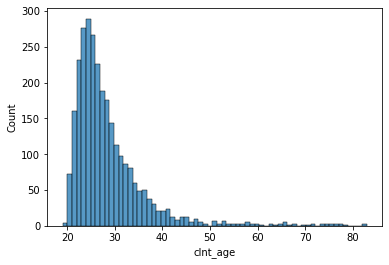

In [26]:
sns.histplot(crm_data.clnt_age)

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

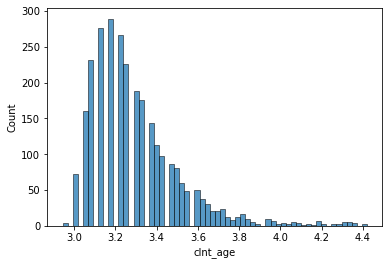

In [27]:
sns.histplot(np.log(crm_data.clnt_age),bins=60)

Распределение похоже на нормальное, но с длинным хвостом справа, поэтому лучше будет прологарифмировать и сохранить как столбец.

In [28]:
crm_data['log_age']=np.log(crm_data.clnt_age)

<AxesSubplot:>

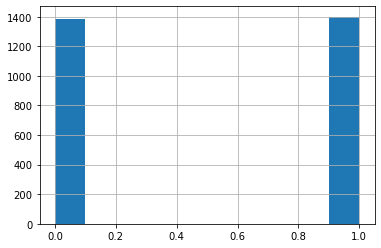

In [29]:
crm_data.clnt_gender.hist()

In [30]:
crm_data.clnt_device.unique()

array(['sO@*%lun08', ')!%OA9qpZP', 'IgSHlRCsd#', 'SSbZb5Hpun',
       'N)Eb*EJXD4', '_)nLk%PngJ', 'vJ#XVpcNy6', 'pi&NYvrpiu',
       'NMZa(_ZevK', 'tZet+bbIC_', 'T+BA%psI8c', 'ghOfqAzHdO',
       '+qOE#oK7Bu', 'm1o4W&JCvy', nan, 'Y1+5*e_(9D', 'rcJgTotoi8',
       'KnasAzg4Vf', 'tyOjI2@FcB', 'A&D5V21q5$', '$pffcP&pkj',
       '^+3(I8C%&b', 'Nljw_d_PZV', 'rreI!9jkPq', 'WUn^8@yRRZ',
       'm4Onx$jC_+', '+d)U@Ozdq@', 'R6B&KN5OOi', 'K*)FJ)edcZ',
       '&qrVc7H^jE', '4(*Kax8&YS', '@bM12Da%6&', 'cN50%TMttL',
       '4!5PbGR!VN', 'W@&0muZANj', '6J4&mF&#tl', 'UaSer)d$CZ',
       'y3FVI6dzfi', 'gTkSzDk+OA', 'yJrFzC0McE', 'nR4%tYIRXv',
       'AWrJqks-tw', '!Zusbz4GJ@', 'sUse$3S4Z%', '4aQwCtPL4(',
       'H#s_lw9F_R', 'exk&etBeLF', 'Bg01S^%Jfy', 'jso!fQ*Q7x',
       'py_Z4O$Gg+', '_cbxM0a-Yi', '-(Tu#R_@lh', 'zzhjn9-Ew-',
       'xAZj4fx97F', 'vB5-)b$ZR+', '_)nAgN9)Gz', 'fXm+BayjVA',
       'YBjx-RAB9!', '&UiIgr6b05', 'C_QpEX%9CB', '(O@$+)2-Iq'],
      dtype=object)

С учетом их примерно одинакового непонятного сложения, лучше будет просто перевести с помощью labelencoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
crm_data['le_device']=le.fit_transform(crm_data.clnt_device.astype(str))

<AxesSubplot:>

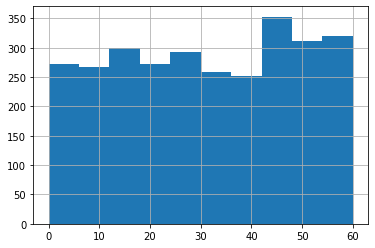

In [33]:
crm_data.le_device.hist()

Распределено примерно равномерно

In [34]:
crm_data.clnt_device_get.unique()

array(['vgIXi0LgoZHQ71Mmekm1', 'lmE6l7DelsqZNYgxcsAZ',
       'yhUtC1GSVpWWNPCI9EYo', 'TM4ptl78Lwzhng7PAY4G',
       'EAE3RcxIwQfn3oIbcXZN', 'RD8BUJjq4e1qknku300N',
       'yHrDLKQ3V9TnmM5OZdNu', 'Xlh4OkBJvFkCElKYmKNQ',
       'liZPCZF6tFgGEt1bTPHs', 'noI8N7cvgfYPRswJVqSt',
       '4tn4ahgRkWMzsSCk5tnp', 'zY5grwt3TK2vXDNOXNtQ',
       'xwVatkCS227il3xATBFE', 'Jw5OmlNzw1TWSySS8Kz6',
       'Wlb9y8b5EujLakHZQZ0D', 'SYy2B7hNPyV792L5eCqu',
       'RKcjWOC0kWGyGsDi325Q', 'duj1wNy6PQygCaQYt6ze',
       'apqNDBwDXCytWs6F1c29', 'a25dNMsZKjRHnhp7WJkD',
       'zPz024CQIonY5H9jYIve', 'vtFJx028ksA5j1r4Gevb',
       '6153L0t8XPPwrqlaHrPc', 'U5K7lQEiD5wBoxQfY6Tz',
       'qhf9RhOTHsX15m3UzA94', 'JZ0KLFgkXP3A9WMANoni',
       'nrQMSSqhv27ILkeKQI8X', 'NJRRltMExbMcFROsvdGD',
       'ZRg0ZwLzu2FL5jted9eX', 'AEvBGGIi1TYMZpsS5CoK',
       'DAHGwLtn4JPcATVSWFHk', 'u6H8Em4pxxagN7S8TAR5',
       'DLtGblMWq46ducD1uhFp', 'C6o0rm2Kne9WJe6IrQhX',
       'jEt2cvpo9kv8BjV7S6ay', 'Jsdxxb8QCqG5031DdLI5',
       'hp

In [35]:
crm_data['le_device_get']=le.fit_transform(crm_data.clnt_device_get.astype(str))

<AxesSubplot:>

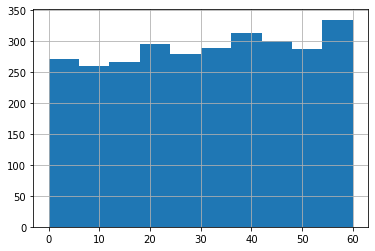

In [36]:
crm_data.le_device_get.hist()

То же самое

<AxesSubplot:>

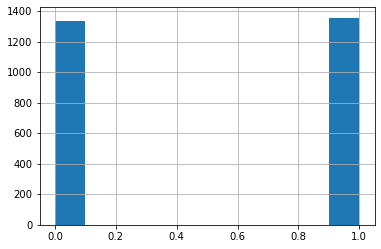

In [37]:
crm_data.has_car.hist()

has_estate       2711 non-null   float64

 7   clnt_children    2899 non-null   int64  
 
 8   clnt_income      2899 non-null   int64  
 
 9   clnt_pick        2899 non-null   int64  
 
 10  clnt_fortune     2899 non-null   int64  
 
 11  clnt_status      2899 non-null   int64  
 
 12  clnt_system      2899 non-null   int64  
 
 13  spend_last       2899 non-null   int64  
 
 14  spend_level      2899 non-null   int64  
 
 15  spend_points     2899 non-null   int64  
 
 16  manager_contact  755 non-null    float64
 
 17  is_premium       1538 non-null   float64

<AxesSubplot:>

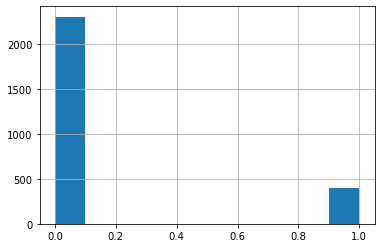

In [38]:
crm_data.has_estate.hist()

Вот тут резкий перекос

<AxesSubplot:>

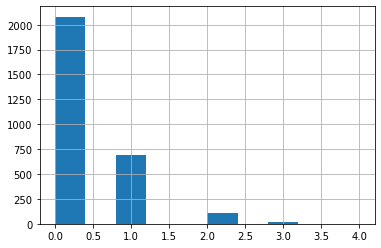

In [39]:
crm_data.clnt_children.hist()

Логарифмическое распределение получается. Окей.

Интересная странность в том, что владение недвижимостью указали не все, в то же время про детей рассказали все, пока не знаю зачем, но интересно.

<AxesSubplot:>

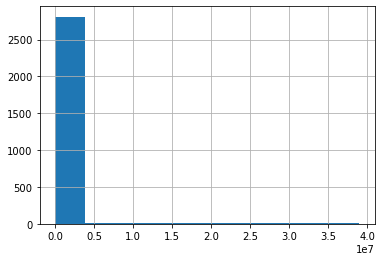

In [40]:
crm_data.clnt_income.hist()

Можно ли опираться на этот столбец? Если данных очень мало.

<AxesSubplot:>

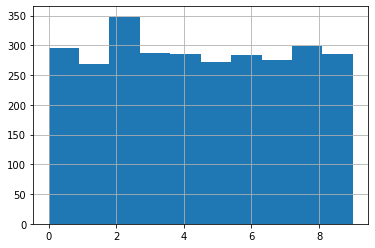

In [41]:
crm_data.clnt_pick.hist()

<AxesSubplot:>

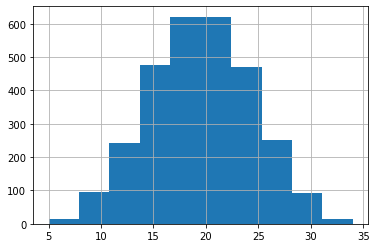

In [42]:
crm_data.clnt_fortune.hist()

Слишком красиво, слишком ровно, слишком странно.

Проблема еще в том, что не особо понятно, что этот столбец значит. Ладно.

<AxesSubplot:>

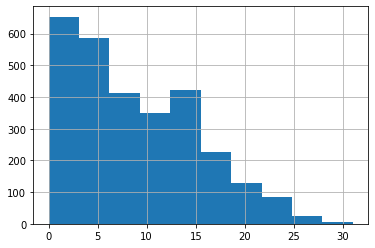

In [43]:
crm_data.clnt_status.hist()

Очень странный треугольник, треугольное распределение с модой вначале?

<AxesSubplot:>

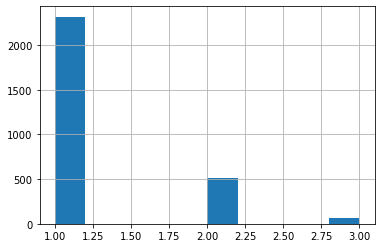

In [44]:
crm_data.clnt_system.hist()

Что-то сильно напоминающее логарифмическое распределение

<AxesSubplot:>

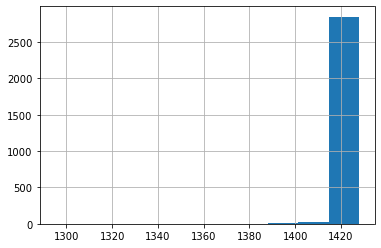

In [45]:
crm_data.spend_last.hist()

Похоже на крайне бесполезный столбец, но пока непонятно как он соотносится с остальными

<AxesSubplot:>

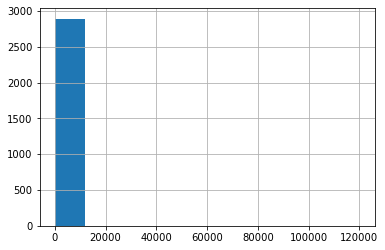

In [46]:
crm_data.spend_level.hist()

In [47]:
crm_data.loc[crm_data['spend_level']>20000].spend_level

335      60000
1254    120000
Name: spend_level, dtype: int64

Всего лишь два значения больше 20к, а что у них по премиуму?

In [48]:
crm_data.loc[crm_data['spend_level']>20000].is_premium

335     1.0
1254    0.0
Name: is_premium, dtype: float64

У них уже проставлен, причем самое интересное то, что у наибольшего spend_level не премиум, поэтому может негативно влиять на алгоритм, надо будет посмотреть потом корреляции общие и определить, стоит ли удалять.

<AxesSubplot:>

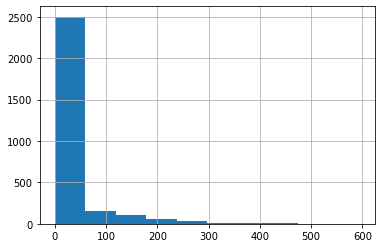

In [49]:
crm_data.spend_points.hist()

In [50]:
crm_data.loc[crm_data['spend_points']>300].spend_points,crm_data.loc[crm_data['spend_points']>300].is_premium

(15     516
 45     332
 56     335
 91     367
 95     404
 155    429
 168    434
 178    344
 189    334
 220    476
 249    354
 253    359
 271    398
 325    371
 329    358
 336    367
 381    336
 384    362
 394    362
 454    412
 461    306
 465    594
 475    375
 545    316
 565    403
 576    388
 633    462
 635    327
 657    442
 716    327
 Name: spend_points, dtype: int64,
 15     1.0
 45     1.0
 56     1.0
 91     1.0
 95     1.0
 155    1.0
 168    1.0
 178    1.0
 189    1.0
 220    1.0
 249    1.0
 253    1.0
 271    1.0
 325    1.0
 329    1.0
 336    1.0
 381    1.0
 384    1.0
 394    1.0
 454    1.0
 461    1.0
 465    1.0
 475    1.0
 545    1.0
 565    1.0
 576    1.0
 633    1.0
 635    1.0
 657    1.0
 716    1.0
 Name: is_premium, dtype: float64)

У всех исключений премиум

<AxesSubplot:>

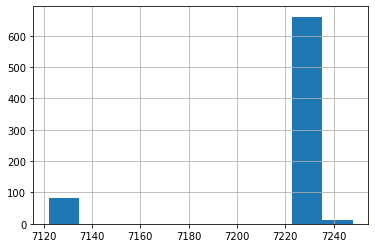

In [51]:
crm_data.manager_contact.hist()

Мало данных, очень странное распределение, может повлиять не самым полезным образом.

<AxesSubplot:>

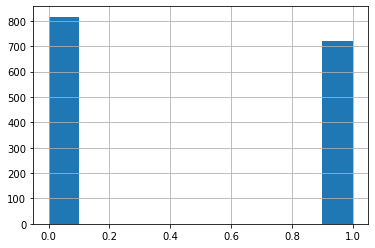

In [52]:
crm_data.is_premium.hist()

In [53]:
crm_data.columns

Index(['clnt_id', 'clnt_gender', 'clnt_age', 'clnt_device', 'clnt_device_get',
       'has_car', 'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level', 'spend_points', 'manager_contact', 'is_premium',
       'log_age', 'le_device', 'le_device_get'],
      dtype='object')

In [54]:
crm_data.drop(['clnt_age'],axis=1,inplace=True)

In [55]:
#sns.pairplot(crm_data.drop(['clnt_id'],axis=1))

Вот так, если окинуть взглядом, многие графики выглядит странно, например максимально нормальное распределение, три параллелограмма, треугольники, многие интересно с исследуемой переменной пересекаются

<AxesSubplot:xlabel='le_device', ylabel='le_device_get'>

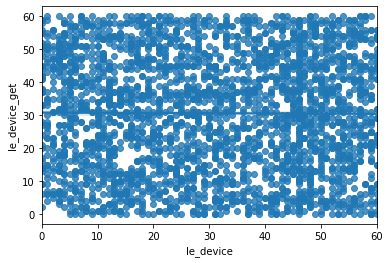

In [56]:
sns.regplot(data=crm_data,x='le_device',y='le_device_get')

создается ощущение, что корреляция очень высока у этих двух переменных

In [57]:
crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique())

(array([42, 45, 38, 33, 51, 55, 21, 50, 20, 41, 27, 44, 48, 37, 28, 24,  9,
        59,  2, 14, 16,  6, 58, 17, 52, 13, 56]),
 27)

In [58]:
crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique())

(array([35, 25, 27, 18, 50, 30, 49, 11, 23, 12, 51, 60, 59, 54, 34, 55, 46,
        37, 15, 45, 47, 28,  4, 20,  7,  6, 33, 26,  9, 52, 43, 14]),
 32)

In [59]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device']==i,'le_device_get'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

27  32  25  30  35  37  36  29  28  33  35  35  37  31  28  27  37  34  32  35  31  35  33  27  32  32  34  34  34  30  26  32  31  34  28  21  32  35  27  33  27  32  31  35  37  35  52  34  43  32  41  33  36  36  36  32  35  34  25  33  26  

(21.0, 33.0, 52.0)

Если у клиента определенный девайс, то он медианно иметь лишь 33 других, от 21 до 52

In [60]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device_get']==i,'le_device'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

33  32  32  27  40  36  39  28  26  35  28  33  33  32  29  24  36  28  34  32  34  35  32  32  28  31  28  33  34  35  26  39  31  27  30  39  38  41  35  29  27  39  28  23  34  47  37  31  34  30  30  38  32  34  39  26  28  32  38  36  32  

(23.0, 32.0, 47.0)

Наоборот примерно одинаковые значения, чу-то это значит, пока просто запомнил.

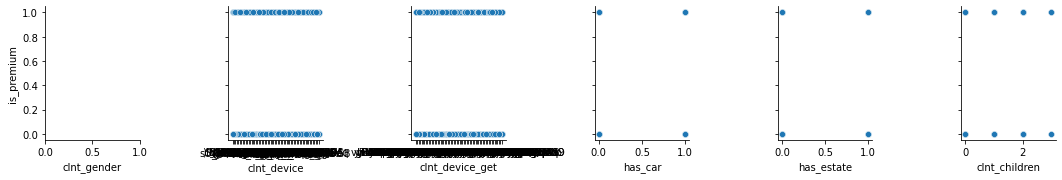

In [61]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[1:7])

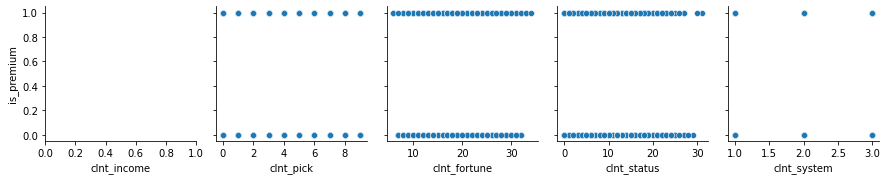

In [62]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[7:12])

Spend_level изучить

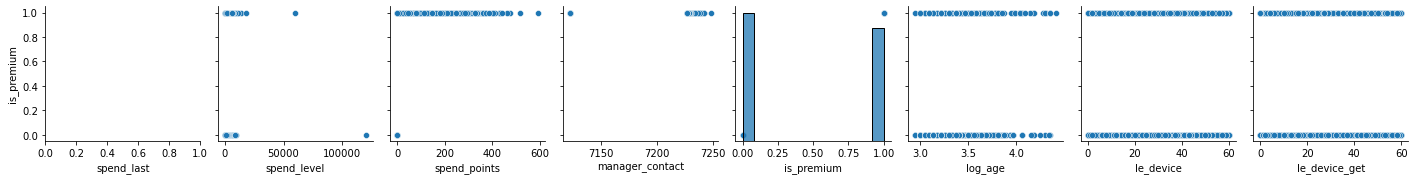

In [63]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[12:])

Если есть менеджер, то точно премиум

In [64]:
crm_data.loc[(crm_data['manager_contact']>7000) & (crm_data['is_premium'] != 1)]

,clnt_id,clnt_gender,clnt_device,clnt_device_get,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium,log_age,le_device,le_device_get
1560,2060,1.0,(O@$+)2-Iq,JZ0KLFgkXP3A9WMANoni,0.0,1.0,0,300000,0,11,3,1,1428,2000,0,7122.0,NaN,3.178054,4,16
1663,2278,1.0,^+3(I8C%&b,DAHGwLtn4JPcATVSWFHk,0.0,0.0,0,200000,0,22,12,1,1428,1000,0,7122.0,NaN,3.091042,33,11
1725,2421,0.0,(O@$+)2-Iq,NaN,0.0,0.0,0,70000,6,12,9,1,1428,200,0,7122.0,NaN,3.583519,4,45
1726,2422,0.0,$pffcP&pkj,AEvBGGIi1TYMZpsS5CoK,0.0,0.0,1,220000,3,13,4,1,1428,400,0,7122.0,NaN,3.583519,1,7
1742,2457,NaN,A&D5V21q5$,xr1OdesOO44Ufzhxxw59,1.0,1.0,0,0,0,21,0,1,1428,1188,0,7122.0,NaN,3.465736,14,55
1757,2484,0.0,WUn^8@yRRZ,RD8BUJjq4e1qknku300N,1.0,0.0,0,340000,2,21,6,1,1428,20,0,7122.0,NaN,3.784190,30,23
1764,2500,0.0,fXm+BayjVA,bDs6Xe2iNTT7AkzC2PVT,0.0,0.0,0,340000,7,10,0,1,1428,484,0,7122.0,NaN,3.178054,39,37
1766,2503,0.0,&UiIgr6b05,DAHGwLtn4JPcATVSWFHk,1.0,0.0,0,0,3,13,7,1,1428,210,0,7122.0,NaN,3.401197,2,11
1881,2783,0.0,K*)FJ)edcZ,RKcjWOC0kWGyGsDi325Q,0.0,0.0,0,110000,0,23,0,1,1428,1100,0,7122.0,NaN,3.637586,20,24
1999,3022,0.0,W@&0muZANj,pup1FL83CRpbaMg9C534,0.0,0.0,1,390000,2,10,2,1,1428,500,0,7122.0,NaN,3.332205,29,49


Они все сразу премиум

In [65]:
crm_data.loc[(crm_data['manager_contact']>7000) ,'is_premium']=1

In [66]:
crm_data.drop('manager_contact',axis=1,inplace=True)

spend_level

<AxesSubplot:xlabel='is_premium', ylabel='spend_level'>

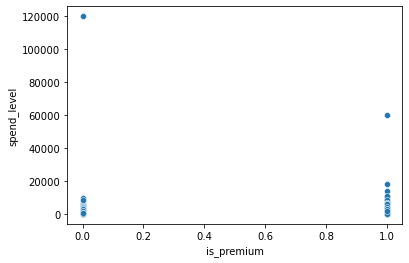

In [67]:
sns.scatterplot(data=crm_data,y='spend_level',x='is_premium')

Думаю что этот "не премиум" с очень большим spend_level, не просто так стал таким, надо будет посмотреть на его транзакции и просто изучить

In [68]:
crm_data.loc[crm_data['spend_level']>80000]

,clnt_id,clnt_gender,clnt_device,clnt_device_get,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,is_premium,log_age,le_device,le_device_get
1254,3964,0.0,A&D5V21q5$,AACwntwTHc6JRW83FHAG,0.0,1.0,1,190000,3,25,14,2,1428,120000,0,0.0,3.258097,14,6


In [69]:
crm_data.loc[(crm_data['clnt_gender']==0)&(crm_data['has_car']==0)&(crm_data['has_estate']==1) & (crm_data['clnt_children']==1)]

,clnt_id,clnt_gender,clnt_device,clnt_device_get,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,is_premium,log_age,le_device,le_device_get
115,2487,0.0,y3FVI6dzfi,duj1wNy6PQygCaQYt6ze,0.0,1.0,1,300000,8,24,15,1,1428,1400,36,1.0,3.178054,58,38
487,4004,0.0,yJrFzC0McE,noI8N7cvgfYPRswJVqSt,0.0,1.0,1,330000,2,11,0,2,1428,808,0,1.0,3.135494,59,46
636,4677,0.0,Y1+5*e_(9D,bDs6Xe2iNTT7AkzC2PVT,0.0,1.0,1,40000,1,27,6,2,1428,322,157,1.0,3.218876,31,37
859,2504,0.0,UaSer)d$CZ,a25dNMsZKjRHnhp7WJkD,0.0,1.0,1,100000,2,14,12,1,1428,1300,0,0.0,3.367296,28,34
922,2726,0.0,jso!fQ*Q7x,pup1FL83CRpbaMg9C534,0.0,1.0,1,360000,9,20,6,1,1428,3308,0,0.0,2.995732,42,49
1081,3342,0.0,+qOE#oK7Bu,hpPCHpM0tO0AhtuGoypP,0.0,1.0,1,10000,0,15,12,1,1428,150,0,0.0,3.433987,7,39
1103,3417,0.0,^+3(I8C%&b,yhUtC1GSVpWWNPCI9EYo,0.0,1.0,1,130000,2,18,15,1,1428,400,0,0.0,3.610918,33,58
1123,3482,0.0,rreI!9jkPq,ZRg0ZwLzu2FL5jted9eX,0.0,1.0,1,200000,5,20,2,1,1428,200,0,0.0,3.526361,50,33
1206,3783,0.0,6J4&mF&#tl,b2ZbgyfuDZYdwsGZq0N9,0.0,1.0,1,330000,0,24,15,2,1428,1500,0,0.0,3.332205,12,36
1254,3964,0.0,A&D5V21q5$,AACwntwTHc6JRW83FHAG,0.0,1.0,1,190000,3,25,14,2,1428,120000,0,0.0,3.258097,14,6


<AxesSubplot:xlabel='is_premium', ylabel='clnt_fortune'>

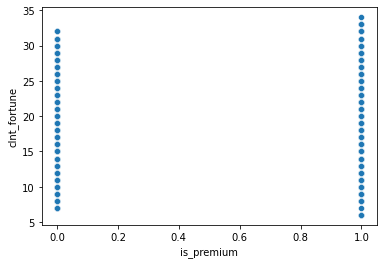

In [70]:
sns.scatterplot(data=crm_data,y='clnt_fortune',x='is_premium')

<AxesSubplot:xlabel='is_premium', ylabel='spend_points'>

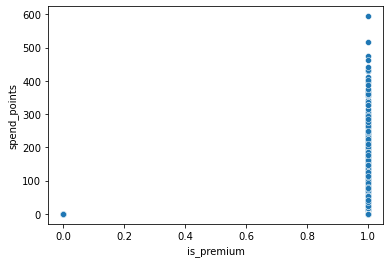

In [71]:
sns.scatterplot(data=crm_data,y='spend_points',x='is_premium')

In [72]:
crm_data.loc[crm_data['spend_points']>0].is_premium.unique()

array([1.])

In [73]:
crm_data.loc[crm_data['spend_points']==0].is_premium.unique()

array([ 1.,  0., nan])

Раз nan только когда =0, то этот столбец не нужен, получается, можно удалить.

In [74]:
crm_data.drop('spend_points',axis=1,inplace=True)
crm_data['vubros']=0
vubros_0=pd.read_csv('vubros_0.csv')
vub0=np.reshape(vubros_0.values,-1)
vubros_0=pd.read_csv('vubros_1.csv')
vub1=np.reshape(vubros_0.values,-1)
crm_data.query('clnt_id in @vub0')['vubros']=1
crm_data.query('clnt_id in @vub1')['vubros']=1
pivo=pd.read_csv('pivot_df.csv')
crm_data=pd.concat([crm_data,pivo],axis=1)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
from category_encoders import *

In [76]:
#crm_data.drop(['le_device', 'le_device_get'],axis=1,inplace=True)
train=crm_data.query('is_premium==1 or is_premium==0')
test=crm_data.drop(train.index)
test.drop(['is_premium','clnt_id','spend_last'],axis=1,inplace=True)
y=train.is_premium
x=train.drop(['clnt_id','is_premium','spend_last'],axis=1)

In [77]:
x.columns

Index(['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_level', 'log_age',
       'le_device', 'le_device_get', 'vubros', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50'],
      dtype='object')

In [78]:
for i in crm_data.columns:
    print(i,end=' ')
    if crm_data[i].dtype!='object':
        print(np.sort(crm_data[i].unique()))
    else:
        print(crm_data[i].unique())

clnt_id [2000 2001 2002 ... 4997 4998 4999]
clnt_gender [ 0.  1. nan]
clnt_device ['sO@*%lun08' ')!%OA9qpZP' 'IgSHlRCsd#' 'SSbZb5Hpun' 'N)Eb*EJXD4'
 '_)nLk%PngJ' 'vJ#XVpcNy6' 'pi&NYvrpiu' 'NMZa(_ZevK' 'tZet+bbIC_'
 'T+BA%psI8c' 'ghOfqAzHdO' '+qOE#oK7Bu' 'm1o4W&JCvy' nan 'Y1+5*e_(9D'
 'rcJgTotoi8' 'KnasAzg4Vf' 'tyOjI2@FcB' 'A&D5V21q5$' '$pffcP&pkj'
 '^+3(I8C%&b' 'Nljw_d_PZV' 'rreI!9jkPq' 'WUn^8@yRRZ' 'm4Onx$jC_+'
 '+d)U@Ozdq@' 'R6B&KN5OOi' 'K*)FJ)edcZ' '&qrVc7H^jE' '4(*Kax8&YS'
 '@bM12Da%6&' 'cN50%TMttL' '4!5PbGR!VN' 'W@&0muZANj' '6J4&mF&#tl'
 'UaSer)d$CZ' 'y3FVI6dzfi' 'gTkSzDk+OA' 'yJrFzC0McE' 'nR4%tYIRXv'
 'AWrJqks-tw' '!Zusbz4GJ@' 'sUse$3S4Z%' '4aQwCtPL4(' 'H#s_lw9F_R'
 'exk&etBeLF' 'Bg01S^%Jfy' 'jso!fQ*Q7x' 'py_Z4O$Gg+' '_cbxM0a-Yi'
 '-(Tu#R_@lh' 'zzhjn9-Ew-' 'xAZj4fx97F' 'vB5-)b$ZR+' '_)nAgN9)Gz'
 'fXm+BayjVA' 'YBjx-RAB9!' '&UiIgr6b05' 'C_QpEX%9CB' '(O@$+)2-Iq']
clnt_device_get ['vgIXi0LgoZHQ71Mmekm1' 'lmE6l7DelsqZNYgxcsAZ' 'yhUtC1GSVpWWNPCI9EYo'
 'TM4ptl78Lwzhng7PAY4G' 'EAE3RcxIwQ

21 [-231884. -156908. -133065. ...  120734.  141802.  335440.]
22 [-459516. -436828. -412985. ...  401943.  494949.  993670.]
23 [-1.16524e+05 -9.20500e+04 -3.39160e+04 -3.24090e+04 -2.26770e+04
 -1.60000e+04 -1.04620e+04 -8.95200e+03 -8.74900e+03 -8.00000e+03
 -7.50000e+03 -6.04400e+03 -6.00000e+03 -4.21000e+03 -3.88600e+03
 -2.94000e+03 -2.60000e+03 -2.50000e+03 -2.00000e+03 -1.67800e+03
 -1.53700e+03 -1.30000e+03 -1.29900e+03 -1.17800e+03 -1.07200e+03
 -1.00000e+03 -9.50000e+02 -8.84000e+02 -8.50000e+02 -8.30000e+02
 -8.00000e+02 -6.80000e+02 -5.57000e+02 -4.20000e+02 -3.50000e+02
 -3.12000e+02 -2.50000e+02 -2.14000e+02 -1.50000e+02 -8.20000e+01
 -5.70000e+01 -3.00000e+01 -2.00000e+01  0.00000e+00  2.51000e+02
  3.00000e+02  1.00000e+03  1.68700e+03  2.33000e+03  1.43900e+04
  1.91260e+04]
24 [-3.25534e+05 -1.33665e+05 -8.23240e+04 -8.02710e+04 -7.90660e+04
 -7.53690e+04 -6.77300e+04 -5.94240e+04 -5.92270e+04 -5.15290e+04
 -4.50580e+04 -3.31000e+04 -2.37540e+04 -2.31800e+04 -1.85000

Получается, что не категор только clnt_income, log_age

In [79]:
test.columns

Index(['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_level', 'log_age',
       'le_device', 'le_device_get', 'vubros', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50'],
      dtype='object')

In [80]:
x.columns

Index(['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_level', 'log_age',
       'le_device', 'le_device_get', 'vubros', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50'],
      dtype='object')

In [81]:

enc = TargetEncoder(cols=['clnt_device', 'clnt_device_get', 
        'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 
       'spend_level'])

# transform the datasets
te_x = enc.fit_transform(x, y)
te_test = enc.transform(test)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def scaleColumns(df1,df2):
    for col in df1.columns:
        df1[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
        df2[col]=pd.DataFrame(scaler.transform(pd.DataFrame(df2[col])),columns=[col])
    return df1,df2
te_t_x,te_t_test=scaleColumns(te_x,te_test)

In [83]:
from xgboost import XGBClassifier

In [84]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
te_t_x, y, test_size=0.2, stratify=y)

In [86]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[23:33:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.36624	validation_1-error:0.42857
[1]	validation_0-error:0.30653	validation_1-error:0.43175
[2]	validation_0-error:0.29061	validation_1-error:0.46349
[3]	validation_0-error:0.27388	validation_1-error:0.42857
[4]	validation_0-error:0.25955	validation_1-error:0.43492
[5]	validation_0-error:0.23328	validation_1-error:0.37143
[6]	validation_0-error:0.22930	validation_1-error:0.38730
[7]	validation_0-error:0.22850	validation_1-error:0.37778
[8]	validation_0-error:0.23169	validation_1-error:0.38413
[9]	validation_0-error:0.22612	validation_1-error:0.39048
[10]	validation_0-error:0.21895	vali

[132]	validation_0-error:0.08678	validation_1-error:0.32381
[133]	validation_0-error:0.08678	validation_1-error:0.32381
[134]	validation_0-error:0.08519	validation_1-error:0.32381
[135]	validation_0-error:0.08439	validation_1-error:0.32698
[136]	validation_0-error:0.08439	validation_1-error:0.33333
[137]	validation_0-error:0.08121	validation_1-error:0.32381
[138]	validation_0-error:0.08121	validation_1-error:0.32698
[139]	validation_0-error:0.08201	validation_1-error:0.32698
[140]	validation_0-error:0.08041	validation_1-error:0.32698
[141]	validation_0-error:0.07962	validation_1-error:0.33016
[142]	validation_0-error:0.08201	validation_1-error:0.32381
[143]	validation_0-error:0.08201	validation_1-error:0.33968
[144]	validation_0-error:0.08121	validation_1-error:0.32698
[145]	validation_0-error:0.08439	validation_1-error:0.33016
[146]	validation_0-error:0.08360	validation_1-error:0.33016
[147]	validation_0-error:0.08121	validation_1-error:0.34921
[148]	validation_0-error:0.07802	validat

[269]	validation_0-error:0.03822	validation_1-error:0.33651
[270]	validation_0-error:0.03822	validation_1-error:0.33651
[271]	validation_0-error:0.03742	validation_1-error:0.33651
[272]	validation_0-error:0.03742	validation_1-error:0.33016
[273]	validation_0-error:0.03662	validation_1-error:0.32381
[274]	validation_0-error:0.03583	validation_1-error:0.32698
[275]	validation_0-error:0.03503	validation_1-error:0.33016
[276]	validation_0-error:0.03742	validation_1-error:0.33333
[277]	validation_0-error:0.03742	validation_1-error:0.33333
[278]	validation_0-error:0.03662	validation_1-error:0.33333
[279]	validation_0-error:0.03583	validation_1-error:0.34286
[280]	validation_0-error:0.03583	validation_1-error:0.33651
[281]	validation_0-error:0.03583	validation_1-error:0.33651
[282]	validation_0-error:0.03662	validation_1-error:0.33651
[283]	validation_0-error:0.03662	validation_1-error:0.33333
[284]	validation_0-error:0.03583	validation_1-error:0.33651
[285]	validation_0-error:0.03662	validat

[406]	validation_0-error:0.01592	validation_1-error:0.32698
[407]	validation_0-error:0.01513	validation_1-error:0.32381
[408]	validation_0-error:0.01513	validation_1-error:0.32381
[409]	validation_0-error:0.01513	validation_1-error:0.32698
[410]	validation_0-error:0.01513	validation_1-error:0.32381
[411]	validation_0-error:0.01592	validation_1-error:0.32381
[412]	validation_0-error:0.01513	validation_1-error:0.32381
[413]	validation_0-error:0.01513	validation_1-error:0.32381
[414]	validation_0-error:0.01513	validation_1-error:0.32381
[415]	validation_0-error:0.01433	validation_1-error:0.32064
[416]	validation_0-error:0.01513	validation_1-error:0.32381
[417]	validation_0-error:0.01433	validation_1-error:0.32381
[418]	validation_0-error:0.01433	validation_1-error:0.32698
[419]	validation_0-error:0.01513	validation_1-error:0.32381
[420]	validation_0-error:0.01592	validation_1-error:0.32698
[421]	validation_0-error:0.01592	validation_1-error:0.32698
[422]	validation_0-error:0.01592	validat

[543]	validation_0-error:0.00955	validation_1-error:0.32381
[544]	validation_0-error:0.00955	validation_1-error:0.32381
[545]	validation_0-error:0.00955	validation_1-error:0.32698
[546]	validation_0-error:0.00955	validation_1-error:0.32698
[547]	validation_0-error:0.00955	validation_1-error:0.32698
[548]	validation_0-error:0.00955	validation_1-error:0.32698
[549]	validation_0-error:0.00955	validation_1-error:0.32698
[550]	validation_0-error:0.00955	validation_1-error:0.32698
[551]	validation_0-error:0.00955	validation_1-error:0.32698
[552]	validation_0-error:0.00955	validation_1-error:0.32698
[553]	validation_0-error:0.00955	validation_1-error:0.32381
[554]	validation_0-error:0.00955	validation_1-error:0.32381
[555]	validation_0-error:0.00955	validation_1-error:0.32381
[556]	validation_0-error:0.00955	validation_1-error:0.32381
[557]	validation_0-error:0.00955	validation_1-error:0.32381
[558]	validation_0-error:0.00955	validation_1-error:0.32381
[559]	validation_0-error:0.00955	validat

[680]	validation_0-error:0.00478	validation_1-error:0.32698
[681]	validation_0-error:0.00478	validation_1-error:0.32698
[682]	validation_0-error:0.00478	validation_1-error:0.32698
[683]	validation_0-error:0.00478	validation_1-error:0.32698
[684]	validation_0-error:0.00478	validation_1-error:0.32381
[685]	validation_0-error:0.00478	validation_1-error:0.32698
[686]	validation_0-error:0.00478	validation_1-error:0.32698
[687]	validation_0-error:0.00478	validation_1-error:0.32698
[688]	validation_0-error:0.00478	validation_1-error:0.32698
[689]	validation_0-error:0.00478	validation_1-error:0.32698
[690]	validation_0-error:0.00478	validation_1-error:0.32698
[691]	validation_0-error:0.00478	validation_1-error:0.32698
[692]	validation_0-error:0.00478	validation_1-error:0.33016
[693]	validation_0-error:0.00557	validation_1-error:0.33016
[694]	validation_0-error:0.00557	validation_1-error:0.32698
[695]	validation_0-error:0.00557	validation_1-error:0.32064
[696]	validation_0-error:0.00478	validat

[817]	validation_0-error:0.00318	validation_1-error:0.32698
[818]	validation_0-error:0.00318	validation_1-error:0.32698
[819]	validation_0-error:0.00318	validation_1-error:0.32698
[820]	validation_0-error:0.00318	validation_1-error:0.32698
[821]	validation_0-error:0.00318	validation_1-error:0.32698
[822]	validation_0-error:0.00318	validation_1-error:0.32698
[823]	validation_0-error:0.00318	validation_1-error:0.32698
[824]	validation_0-error:0.00318	validation_1-error:0.32698
[825]	validation_0-error:0.00318	validation_1-error:0.32698
[826]	validation_0-error:0.00318	validation_1-error:0.32698
[827]	validation_0-error:0.00318	validation_1-error:0.32698
[828]	validation_0-error:0.00318	validation_1-error:0.33016
[829]	validation_0-error:0.00318	validation_1-error:0.33016
[830]	validation_0-error:0.00318	validation_1-error:0.33333
[831]	validation_0-error:0.00318	validation_1-error:0.33333
[832]	validation_0-error:0.00318	validation_1-error:0.33333
[833]	validation_0-error:0.00318	validat

[954]	validation_0-error:0.00318	validation_1-error:0.35238
[955]	validation_0-error:0.00318	validation_1-error:0.35238
[956]	validation_0-error:0.00318	validation_1-error:0.35238
[957]	validation_0-error:0.00318	validation_1-error:0.35238
[958]	validation_0-error:0.00318	validation_1-error:0.35238
[959]	validation_0-error:0.00318	validation_1-error:0.35238
[960]	validation_0-error:0.00318	validation_1-error:0.35238
[961]	validation_0-error:0.00318	validation_1-error:0.35238
[962]	validation_0-error:0.00318	validation_1-error:0.35238
[963]	validation_0-error:0.00318	validation_1-error:0.34921
[964]	validation_0-error:0.00318	validation_1-error:0.34921
[965]	validation_0-error:0.00318	validation_1-error:0.34921
[966]	validation_0-error:0.00318	validation_1-error:0.34921
[967]	validation_0-error:0.00318	validation_1-error:0.34921
[968]	validation_0-error:0.00318	validation_1-error:0.34921
[969]	validation_0-error:0.00318	validation_1-error:0.34921
[970]	validation_0-error:0.00318	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

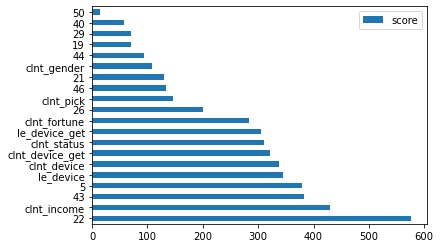

In [87]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())[:20]
values = list(feature_important.values())[:20]

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

видны самые влиятельные на основе таргет энкода

In [88]:
encc = CatBoostEncoder(cols=['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system',
       'spend_level'])

# transform the datasets
encc.fit(x,y)
tec_x = encc.transform(x)
tec_test = encc.transform(test)
tec_t_x,tec_t_test=scaleColumns(tec_x,tec_test)
modelc = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
X_train, X_test, y_train, y_test = train_test_split(
tec_t_x, y, test_size=0.2, stratify=y)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time modelc.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[23:33:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.34713	validation_1-error:0.45397
[1]	validation_0-error:0.30255	validation_1-error:0.43175
[2]	validation_0-error:0.28901	validation_1-error:0.41905
[3]	validation_0-error:0.26592	validation_1-error:0.41270
[4]	validation_0-error:0.26035	validation_1-error:0.42857
[5]	validation_0-error:0.24283	validation_1-error:0.37778
[6]	validation_0-error:0.24045	validation_1-error:0.37460
[7]	validation_0-error:0.22850	validation_1-error:0.33968
[8]	validation_0-error:0.22373	validation_1-error:0.33651
[9]	validation_0-error:0.21576	validation_1-error:0.36190
[10]	validation_0-error:0.19984	vali

[132]	validation_0-error:0.09156	validation_1-error:0.29841
[133]	validation_0-error:0.08838	validation_1-error:0.30794
[134]	validation_0-error:0.09156	validation_1-error:0.31111
[135]	validation_0-error:0.08997	validation_1-error:0.30476
[136]	validation_0-error:0.08917	validation_1-error:0.30476
[137]	validation_0-error:0.08917	validation_1-error:0.30476
[138]	validation_0-error:0.08838	validation_1-error:0.30476
[139]	validation_0-error:0.08678	validation_1-error:0.31111
[140]	validation_0-error:0.08360	validation_1-error:0.31746
[141]	validation_0-error:0.08201	validation_1-error:0.31429
[142]	validation_0-error:0.08201	validation_1-error:0.31429
[143]	validation_0-error:0.08280	validation_1-error:0.31111
[144]	validation_0-error:0.08360	validation_1-error:0.31111
[145]	validation_0-error:0.08201	validation_1-error:0.31111
[146]	validation_0-error:0.08201	validation_1-error:0.30794
[147]	validation_0-error:0.08360	validation_1-error:0.31429
[148]	validation_0-error:0.08121	validat

[269]	validation_0-error:0.04618	validation_1-error:0.31111
[270]	validation_0-error:0.04618	validation_1-error:0.31111
[271]	validation_0-error:0.04459	validation_1-error:0.31111
[272]	validation_0-error:0.04459	validation_1-error:0.30794
[273]	validation_0-error:0.04299	validation_1-error:0.30794
[274]	validation_0-error:0.04220	validation_1-error:0.30794
[275]	validation_0-error:0.04299	validation_1-error:0.30794
[276]	validation_0-error:0.04299	validation_1-error:0.30476
[277]	validation_0-error:0.04299	validation_1-error:0.30476
[278]	validation_0-error:0.04379	validation_1-error:0.30476
[279]	validation_0-error:0.04220	validation_1-error:0.30794
[280]	validation_0-error:0.04220	validation_1-error:0.29841
[281]	validation_0-error:0.04220	validation_1-error:0.31111
[282]	validation_0-error:0.04220	validation_1-error:0.29841
[283]	validation_0-error:0.04140	validation_1-error:0.30159
[284]	validation_0-error:0.04220	validation_1-error:0.30476
[285]	validation_0-error:0.03981	validat

[406]	validation_0-error:0.02787	validation_1-error:0.28889
[407]	validation_0-error:0.02787	validation_1-error:0.28889
[408]	validation_0-error:0.02787	validation_1-error:0.29524
[409]	validation_0-error:0.02787	validation_1-error:0.29206
[410]	validation_0-error:0.02787	validation_1-error:0.29206
[411]	validation_0-error:0.02787	validation_1-error:0.29206
[412]	validation_0-error:0.02548	validation_1-error:0.29206
[413]	validation_0-error:0.02468	validation_1-error:0.29206
[414]	validation_0-error:0.02468	validation_1-error:0.28889
[415]	validation_0-error:0.02468	validation_1-error:0.29206
[416]	validation_0-error:0.02468	validation_1-error:0.29206
[417]	validation_0-error:0.02468	validation_1-error:0.29524
[418]	validation_0-error:0.02548	validation_1-error:0.29206
[419]	validation_0-error:0.02468	validation_1-error:0.29524
[420]	validation_0-error:0.02468	validation_1-error:0.29841
[421]	validation_0-error:0.02468	validation_1-error:0.29524
[422]	validation_0-error:0.02468	validat

[543]	validation_0-error:0.01274	validation_1-error:0.27936
[544]	validation_0-error:0.01194	validation_1-error:0.28254
[545]	validation_0-error:0.01115	validation_1-error:0.27936
[546]	validation_0-error:0.01115	validation_1-error:0.27936
[547]	validation_0-error:0.01115	validation_1-error:0.27936
[548]	validation_0-error:0.01115	validation_1-error:0.28254
[549]	validation_0-error:0.01115	validation_1-error:0.27936
[550]	validation_0-error:0.01115	validation_1-error:0.28254
[551]	validation_0-error:0.01115	validation_1-error:0.28254
[552]	validation_0-error:0.01115	validation_1-error:0.27936
[553]	validation_0-error:0.01115	validation_1-error:0.27936
[554]	validation_0-error:0.01115	validation_1-error:0.27936
[555]	validation_0-error:0.01115	validation_1-error:0.27936
[556]	validation_0-error:0.01115	validation_1-error:0.27619
[557]	validation_0-error:0.01115	validation_1-error:0.27619
[558]	validation_0-error:0.01115	validation_1-error:0.27936
[559]	validation_0-error:0.01115	validat

[680]	validation_0-error:0.00557	validation_1-error:0.28254
[681]	validation_0-error:0.00557	validation_1-error:0.28254
[682]	validation_0-error:0.00557	validation_1-error:0.28571
[683]	validation_0-error:0.00557	validation_1-error:0.28889
[684]	validation_0-error:0.00557	validation_1-error:0.28571
[685]	validation_0-error:0.00557	validation_1-error:0.28571
[686]	validation_0-error:0.00557	validation_1-error:0.28571
[687]	validation_0-error:0.00557	validation_1-error:0.28571
[688]	validation_0-error:0.00557	validation_1-error:0.28571
[689]	validation_0-error:0.00557	validation_1-error:0.28571
[690]	validation_0-error:0.00557	validation_1-error:0.28571
[691]	validation_0-error:0.00557	validation_1-error:0.28571
[692]	validation_0-error:0.00478	validation_1-error:0.28889
[693]	validation_0-error:0.00478	validation_1-error:0.28889
[694]	validation_0-error:0.00478	validation_1-error:0.28889
[695]	validation_0-error:0.00478	validation_1-error:0.29206
[696]	validation_0-error:0.00478	validat

[817]	validation_0-error:0.00398	validation_1-error:0.29841
[818]	validation_0-error:0.00398	validation_1-error:0.29841
[819]	validation_0-error:0.00398	validation_1-error:0.29841
[820]	validation_0-error:0.00398	validation_1-error:0.29841
[821]	validation_0-error:0.00398	validation_1-error:0.29841
[822]	validation_0-error:0.00398	validation_1-error:0.29841
[823]	validation_0-error:0.00398	validation_1-error:0.29841
[824]	validation_0-error:0.00318	validation_1-error:0.29841
[825]	validation_0-error:0.00318	validation_1-error:0.29841
[826]	validation_0-error:0.00318	validation_1-error:0.30159
[827]	validation_0-error:0.00318	validation_1-error:0.30159
[828]	validation_0-error:0.00318	validation_1-error:0.30159
[829]	validation_0-error:0.00239	validation_1-error:0.30476
[830]	validation_0-error:0.00239	validation_1-error:0.30476
[831]	validation_0-error:0.00239	validation_1-error:0.30476
[832]	validation_0-error:0.00239	validation_1-error:0.30476
[833]	validation_0-error:0.00239	validat

[954]	validation_0-error:0.00239	validation_1-error:0.29206
[955]	validation_0-error:0.00239	validation_1-error:0.29206
[956]	validation_0-error:0.00239	validation_1-error:0.29206
[957]	validation_0-error:0.00239	validation_1-error:0.28889
[958]	validation_0-error:0.00239	validation_1-error:0.28889
[959]	validation_0-error:0.00239	validation_1-error:0.28889
[960]	validation_0-error:0.00239	validation_1-error:0.28889
[961]	validation_0-error:0.00239	validation_1-error:0.28889
[962]	validation_0-error:0.00239	validation_1-error:0.28889
[963]	validation_0-error:0.00239	validation_1-error:0.28889
[964]	validation_0-error:0.00239	validation_1-error:0.28889
[965]	validation_0-error:0.00239	validation_1-error:0.28889
[966]	validation_0-error:0.00239	validation_1-error:0.28889
[967]	validation_0-error:0.00239	validation_1-error:0.28889
[968]	validation_0-error:0.00239	validation_1-error:0.28889
[969]	validation_0-error:0.00239	validation_1-error:0.28889
[970]	validation_0-error:0.00239	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

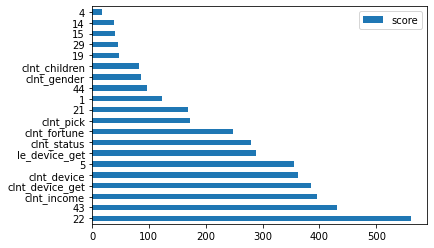

In [89]:
feature_important = modelc.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())[:20]
values = list(feature_important.values())[:20]

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [90]:
enccc = WOEEncoder(cols=['clnt_gender', 'clnt_device', 'clnt_device_get', 'has_car',
       'has_estate', 'clnt_children',  'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system',
       'spend_level'])

# transform the datasets
enccc.fit(x,y)
tecc_x = enccc.transform(x)
tecc_test = enccc.transform(test)
tecc_t_x,tecc_t_test=scaleColumns(tecc_x,tecc_test)
modelcc = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=1)
X_train, X_test, y_train, y_test = train_test_split(
tecc_t_x, y, test_size=0.2, stratify=y)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["error"]
%time modelcc.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

c:\users\vikto\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[23:33:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.36146	validation_1-error:0.42857
[1]	validation_0-error:0.29459	validation_1-error:0.42857
[2]	validation_0-error:0.28901	validation_1-error:0.44127
[3]	validation_0-error:0.26672	validation_1-error:0.36825
[4]	validation_0-error:0.26354	validation_1-error:0.38095
[5]	validation_0-error:0.21576	validation_1-error:0.36825
[6]	validation_0-error:0.21338	validation_1-error:0.37460
[7]	validation_0-error:0.21258	validation_1-error:0.34921
[8]	validation_0-error:0.20780	validation_1-error:0.37143
[9]	validation_0-error:0.20621	validation_1-error:0.38095
[10]	validation_0-error:0.19347	vali

[132]	validation_0-error:0.08201	validation_1-error:0.34286
[133]	validation_0-error:0.08280	validation_1-error:0.34603
[134]	validation_0-error:0.08041	validation_1-error:0.34286
[135]	validation_0-error:0.07962	validation_1-error:0.34603
[136]	validation_0-error:0.08041	validation_1-error:0.34603
[137]	validation_0-error:0.07962	validation_1-error:0.34603
[138]	validation_0-error:0.07802	validation_1-error:0.34921
[139]	validation_0-error:0.07564	validation_1-error:0.35238
[140]	validation_0-error:0.07723	validation_1-error:0.35238
[141]	validation_0-error:0.07802	validation_1-error:0.35238
[142]	validation_0-error:0.07564	validation_1-error:0.34286
[143]	validation_0-error:0.07564	validation_1-error:0.34921
[144]	validation_0-error:0.07564	validation_1-error:0.34921
[145]	validation_0-error:0.07404	validation_1-error:0.35238
[146]	validation_0-error:0.07404	validation_1-error:0.34921
[147]	validation_0-error:0.07404	validation_1-error:0.34921
[148]	validation_0-error:0.07325	validat

[269]	validation_0-error:0.04140	validation_1-error:0.33333
[270]	validation_0-error:0.04140	validation_1-error:0.33651
[271]	validation_0-error:0.04220	validation_1-error:0.33333
[272]	validation_0-error:0.04220	validation_1-error:0.33333
[273]	validation_0-error:0.04061	validation_1-error:0.33333
[274]	validation_0-error:0.03981	validation_1-error:0.33016
[275]	validation_0-error:0.03901	validation_1-error:0.32698
[276]	validation_0-error:0.03901	validation_1-error:0.33333
[277]	validation_0-error:0.03901	validation_1-error:0.33016
[278]	validation_0-error:0.03901	validation_1-error:0.33016
[279]	validation_0-error:0.03822	validation_1-error:0.33016
[280]	validation_0-error:0.03901	validation_1-error:0.33651
[281]	validation_0-error:0.03662	validation_1-error:0.33333
[282]	validation_0-error:0.03662	validation_1-error:0.33333
[283]	validation_0-error:0.03662	validation_1-error:0.33651
[284]	validation_0-error:0.03503	validation_1-error:0.33016
[285]	validation_0-error:0.03662	validat

[406]	validation_0-error:0.01990	validation_1-error:0.34921
[407]	validation_0-error:0.01911	validation_1-error:0.34603
[408]	validation_0-error:0.01990	validation_1-error:0.34603
[409]	validation_0-error:0.01911	validation_1-error:0.34603
[410]	validation_0-error:0.01911	validation_1-error:0.34603
[411]	validation_0-error:0.01990	validation_1-error:0.34921
[412]	validation_0-error:0.01990	validation_1-error:0.34603
[413]	validation_0-error:0.01911	validation_1-error:0.34921
[414]	validation_0-error:0.01911	validation_1-error:0.35873
[415]	validation_0-error:0.01990	validation_1-error:0.35556
[416]	validation_0-error:0.01990	validation_1-error:0.35556
[417]	validation_0-error:0.02070	validation_1-error:0.35556
[418]	validation_0-error:0.01990	validation_1-error:0.35556
[419]	validation_0-error:0.01911	validation_1-error:0.35556
[420]	validation_0-error:0.01831	validation_1-error:0.35556
[421]	validation_0-error:0.01752	validation_1-error:0.35238
[422]	validation_0-error:0.01752	validat

[543]	validation_0-error:0.00876	validation_1-error:0.34603
[544]	validation_0-error:0.00876	validation_1-error:0.34603
[545]	validation_0-error:0.00876	validation_1-error:0.34603
[546]	validation_0-error:0.00876	validation_1-error:0.34603
[547]	validation_0-error:0.00876	validation_1-error:0.34921
[548]	validation_0-error:0.00796	validation_1-error:0.34921
[549]	validation_0-error:0.00796	validation_1-error:0.34921
[550]	validation_0-error:0.00876	validation_1-error:0.35238
[551]	validation_0-error:0.00876	validation_1-error:0.35238
[552]	validation_0-error:0.00876	validation_1-error:0.34921
[553]	validation_0-error:0.00796	validation_1-error:0.35238
[554]	validation_0-error:0.00717	validation_1-error:0.34921
[555]	validation_0-error:0.00717	validation_1-error:0.34921
[556]	validation_0-error:0.00796	validation_1-error:0.34921
[557]	validation_0-error:0.00717	validation_1-error:0.34603
[558]	validation_0-error:0.00796	validation_1-error:0.34603
[559]	validation_0-error:0.00796	validat

[680]	validation_0-error:0.00717	validation_1-error:0.35238
[681]	validation_0-error:0.00717	validation_1-error:0.35238
[682]	validation_0-error:0.00717	validation_1-error:0.35238
[683]	validation_0-error:0.00717	validation_1-error:0.35238
[684]	validation_0-error:0.00717	validation_1-error:0.35238
[685]	validation_0-error:0.00717	validation_1-error:0.35238
[686]	validation_0-error:0.00717	validation_1-error:0.34921
[687]	validation_0-error:0.00717	validation_1-error:0.34603
[688]	validation_0-error:0.00717	validation_1-error:0.35238
[689]	validation_0-error:0.00717	validation_1-error:0.35238
[690]	validation_0-error:0.00717	validation_1-error:0.35556
[691]	validation_0-error:0.00717	validation_1-error:0.35238
[692]	validation_0-error:0.00717	validation_1-error:0.35238
[693]	validation_0-error:0.00717	validation_1-error:0.34921
[694]	validation_0-error:0.00717	validation_1-error:0.34921
[695]	validation_0-error:0.00717	validation_1-error:0.34921
[696]	validation_0-error:0.00717	validat

[817]	validation_0-error:0.00478	validation_1-error:0.35873
[818]	validation_0-error:0.00478	validation_1-error:0.35873
[819]	validation_0-error:0.00478	validation_1-error:0.35873
[820]	validation_0-error:0.00478	validation_1-error:0.35873
[821]	validation_0-error:0.00478	validation_1-error:0.35873
[822]	validation_0-error:0.00478	validation_1-error:0.35873
[823]	validation_0-error:0.00478	validation_1-error:0.35873
[824]	validation_0-error:0.00478	validation_1-error:0.35873
[825]	validation_0-error:0.00478	validation_1-error:0.35873
[826]	validation_0-error:0.00478	validation_1-error:0.35873
[827]	validation_0-error:0.00478	validation_1-error:0.35873
[828]	validation_0-error:0.00478	validation_1-error:0.35873
[829]	validation_0-error:0.00478	validation_1-error:0.35873
[830]	validation_0-error:0.00478	validation_1-error:0.35873
[831]	validation_0-error:0.00478	validation_1-error:0.35873
[832]	validation_0-error:0.00478	validation_1-error:0.35873
[833]	validation_0-error:0.00478	validat

[954]	validation_0-error:0.00318	validation_1-error:0.36508
[955]	validation_0-error:0.00318	validation_1-error:0.36508
[956]	validation_0-error:0.00318	validation_1-error:0.36508
[957]	validation_0-error:0.00318	validation_1-error:0.36508
[958]	validation_0-error:0.00318	validation_1-error:0.36508
[959]	validation_0-error:0.00318	validation_1-error:0.36508
[960]	validation_0-error:0.00318	validation_1-error:0.36508
[961]	validation_0-error:0.00318	validation_1-error:0.36508
[962]	validation_0-error:0.00318	validation_1-error:0.36508
[963]	validation_0-error:0.00318	validation_1-error:0.36508
[964]	validation_0-error:0.00318	validation_1-error:0.36508
[965]	validation_0-error:0.00318	validation_1-error:0.36508
[966]	validation_0-error:0.00318	validation_1-error:0.36508
[967]	validation_0-error:0.00318	validation_1-error:0.36508
[968]	validation_0-error:0.00318	validation_1-error:0.36508
[969]	validation_0-error:0.00318	validation_1-error:0.36508
[970]	validation_0-error:0.00318	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

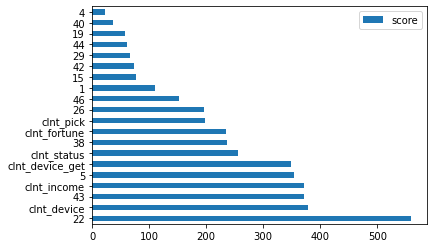

In [91]:
feature_important = modelcc.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())[:20]
values = list(feature_important.values())[:20]

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

Вне зависимости от типа энкодинга, clnt_income имеет наибольшее влияние, попробую отправить пока это, вдруг зайдет

<AxesSubplot:ylabel='Count'>

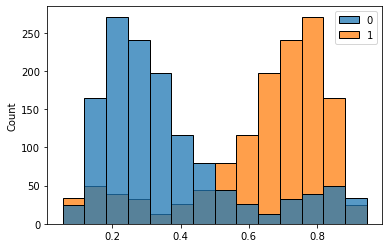

In [130]:
sns.histplot(modelc.predict_proba(encc_test))

In [189]:
w=pd.Series(modelc.predict_proba(encc_test).T[1])
q=w-0.1
w=q.round()

In [190]:
testing=crm_data.drop(train.index).reset_index(drop=True).loc[:,['clnt_id']]
testing

,clnt_id
0,2000
1,2004
2,2007
3,2010
4,2011
...,...
1323,4984
1324,4986
1325,4987
1326,4991


In [191]:
testing=pd.concat([testing,w],axis=1)
testing

,clnt_id,0
0,2000,0.0
1,2004,1.0
2,2007,0.0
3,2010,1.0
4,2011,0.0
...,...,...
1323,4984,1.0
1324,4986,0.0
1325,4987,1.0
1326,4991,1.0


In [192]:
sab=pd.read_csv('sample_submit.csv')
sab

,clnt_id,is_premium
0,2018,0
1,2029,0
2,2035,0
3,2060,0
4,2063,0
...,...,...
1356,4984,0
1357,4986,0
1358,4987,0
1359,4991,0


In [193]:
for i in sab.index:
    fl=0
    for j in testing.index:
        if sab.loc[i,'clnt_id']==testing.loc[j,'clnt_id']:
            sab.loc[i,'is_premium']=testing.loc[j,0]
            fl=1
            break
    if fl==0:
        for j in crm_data.index:
            if (sab.loc[i,'clnt_id']==crm_data.loc[j,'clnt_id']):
                sab.loc[i,'is_premium']=crm_data.loc[j,'is_premium']
                fl=1
                break
    if fl==0:
        print(sab.loc[i,'clnt_id'])

In [194]:
sab=sab.astype('int64')

In [195]:
sab.to_csv('submission.csv',index=False)

In [199]:
sab.is_premium.value_counts()

1    990
0    371
Name: is_premium, dtype: int64